In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
customer_data_merged3 = pd.read_csv("demodata2.csv")
customer_data_merged3.head()

,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat
0,1,0,Prefer not to say,5.0,Health,-75.54,41.36
1,2,0,"$50,000-$99,999",4.0,Value,-77.10,43.02
2,3,0,"$50,000-$99,999",1.0,Help,-76.76,38.87
3,4,0,"$150,000-$199,999",4.0,Help,-77.27,38.62
4,5,0,"$200,000 or more",3.0,Help,-77.77,43.17


In [26]:
customer_data_merged3.isna().sum()

GeneratedAnonCID             0
ShopsWholeFoods              0
HouseholdIncome              0
HouseholdTotal               0
HealthHelpValueSegment       0
long                      1015
lat                       1015
dtype: int64

In [27]:
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['Prefer not to say'],0)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['Not sure'],0)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['$19,999 or less'],1)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['$20,000-$49,999'],2)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['$50,000-$99,999'],3)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['$100,000-$149,999'],4)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['$150,000-$199,999'],5)
customer_data_merged3['HouseholdIncome'] = customer_data_merged3['HouseholdIncome'].replace(['$200,000 or more'],6)
customer_data_merged3['HealthHelpValueSegment'] = customer_data_merged3['HealthHelpValueSegment'].replace(['No preference'],0)
customer_data_merged3['HealthHelpValueSegment'] = customer_data_merged3['HealthHelpValueSegment'].replace(['Help'],1)
customer_data_merged3['HealthHelpValueSegment'] = customer_data_merged3['HealthHelpValueSegment'].replace(['Value'],2)
customer_data_merged3['HealthHelpValueSegment'] = customer_data_merged3['HealthHelpValueSegment'].replace(['Health'],3)
customer_data_merged3

,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat
0,1,0,0,5.0,3,-75.54,41.36
1,2,0,3,4.0,2,-77.10,43.02
2,3,0,3,1.0,1,-76.76,38.87
3,4,0,5,4.0,1,-77.27,38.62
4,5,0,6,3.0,1,-77.77,43.17
...,...,...,...,...,...,...,...
16354,16355,0,6,4.0,1,-76.15,36.88
16355,16356,0,6,3.0,1,-77.48,38.99
16356,16357,0,0,2.0,1,-71.12,42.28
16357,16358,1,5,2.0,3,-75.27,40.00


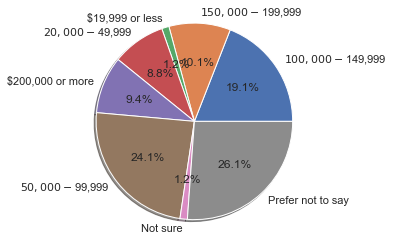

In [25]:
labels = labeled_data['HouseholdIncome'].astype('category').cat.categories.tolist()
counts = labeled_data['HouseholdIncome'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

<AxesSubplot:title={'center':'HealthHelpValueSegment'}>

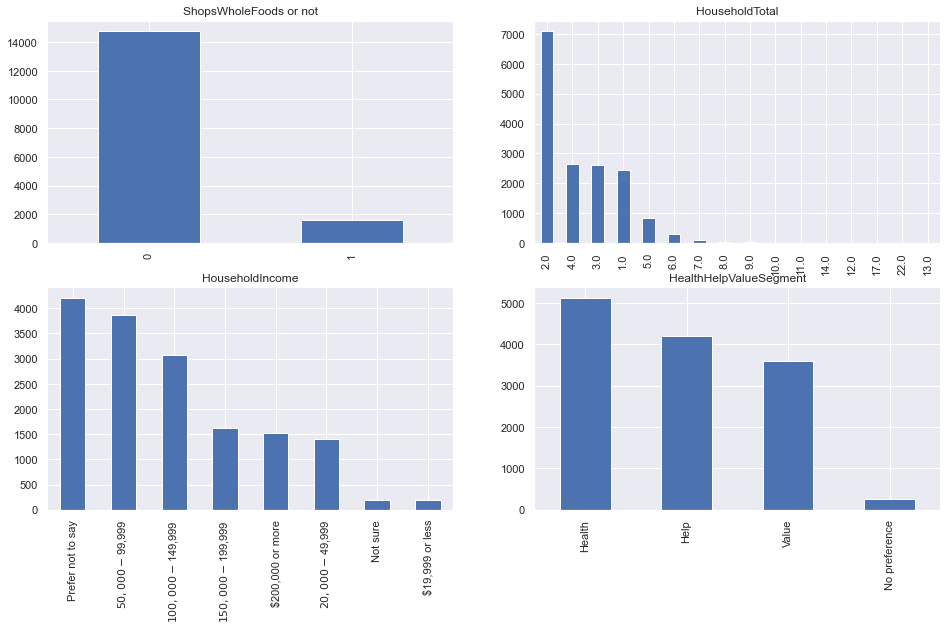

In [46]:
plt.subplot(221)
labeled_data['ShopsWholeFoods'].value_counts().plot(kind='bar', title='ShopsWholeFoods or not', figsize=(16,9))
plt.subplot(222)
labeled_data['HouseholdTotal'].value_counts().plot(kind='bar', title='HouseholdTotal', figsize=(16,9))
plt.subplot(223)
labeled_data['HouseholdIncome'].value_counts().plot(kind='bar', title='HouseholdIncome', figsize=(16,9))
plt.subplot(224)
labeled_data['HealthHelpValueSegment'].value_counts().plot(kind='bar', title='HealthHelpValueSegment', figsize=(16,9))

In [186]:
sales_by_store = pd.read_csv("customer-salesbystore-data-deidentified.csv")

In [187]:
sales_by_store.head()

,GeneratedAnonCID,LOCATION_NBR,LOCATION_NAME_FULL,STORE_LAT,STORE_LONG,UNITS_PURCHASED,DOLLARS_PURCHASED
0,429,38,038-AUBURN,42.931400,-76.565400,409,1196.42
1,13124,39,039-FAIRMOUNT,43.047200,-76.226200,201,501.98
2,408,83,083-SHERIDAN DR.,42.977000,-78.737800,689,2729.44
3,9958,62,062-MARKETPLACE,43.083580,-77.627480,25,82.77
4,14180,145,145-WAKE FOREST,35.964242,-78.534349,84,188.30


In [150]:
sales_by_store_location = sales_by_store[["GeneratedAnonCID","STORE_LAT", "STORE_LONG"]]

In [139]:
sales_by_store.dropna(how='any')

,GeneratedAnonCID,LOCATION_NBR,LOCATION_NAME_FULL,STORE_LAT,STORE_LONG,UNITS_PURCHASED,DOLLARS_PURCHASED
0,429,38,038-AUBURN,42.931400,-76.565400,409,1196.42
1,13124,39,039-FAIRMOUNT,43.047200,-76.226200,201,501.98
2,408,83,083-SHERIDAN DR.,42.977000,-78.737800,689,2729.44
3,9958,62,062-MARKETPLACE,43.083580,-77.627480,25,82.77
4,14180,145,145-WAKE FOREST,35.964242,-78.534349,84,188.30
...,...,...,...,...,...,...,...
33131,15226,33,033-CICERO,43.155700,-76.119000,3,2.67
33132,5699,18,018-EAST AVE.,43.146190,-77.556220,1,5.99
33133,13423,18,018-EAST AVE.,43.146190,-77.556220,3,11.76
33134,13847,25,025-PITTSFORD,43.106100,-77.543660,2,4.98


In [81]:
unit_dollar = sales_by_store[["GeneratedAnonCID", "UNITS_PURCHASED","DOLLARS_PURCHASED"]]

In [83]:
unit_dollar2 = unit_dollar.groupby(["GeneratedAnonCID"]).UNITS_PURCHASED.sum().reset_index()
unit_dollar3= unit_dollar.groupby(["GeneratedAnonCID"]).DOLLARS_PURCHASED.sum().reset_index()

In [84]:
unit_dollar3 = unit_dollar.dropna()
unit_dollar4 = unit_dollar3.drop_duplicates(subset='GeneratedAnonCID', keep="first")
unit_dollar4

,GeneratedAnonCID,UNITS_PURCHASED,DOLLARS_PURCHASED
0,429,409,1196.42
1,13124,201,501.98
2,408,689,2729.44
3,9958,25,82.77
4,14180,84,188.30
...,...,...,...
33034,2266,2,40.00
33037,8579,5,36.67
33118,201,1,7.99
33121,1710,2,5.77


In [88]:
merged_demo = pd.merge(customer_data_merged3,unit_dollar4,on='GeneratedAnonCID',how='inner')
merged_demo.isna()

,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat,UNITS_PURCHASED,DOLLARS_PURCHASED
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15415,False,False,False,False,False,False,False,False,False
15416,False,False,False,False,False,False,False,False,False
15417,False,False,False,False,False,False,False,False,False
15418,False,False,False,False,False,False,False,False,False


In [89]:
merged_demo.head()

,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat,UNITS_PURCHASED,DOLLARS_PURCHASED
0,1,0,0,5.0,3,-75.54,41.36,803,3430.71
1,2,0,3,4.0,2,-77.10,43.02,790,2533.81
2,3,0,3,1.0,1,-76.76,38.87,276,1197.88
3,4,0,5,4.0,1,-77.27,38.62,393,1957.67
4,5,0,6,3.0,1,-77.77,43.17,9,57.92


<AxesSubplot:>

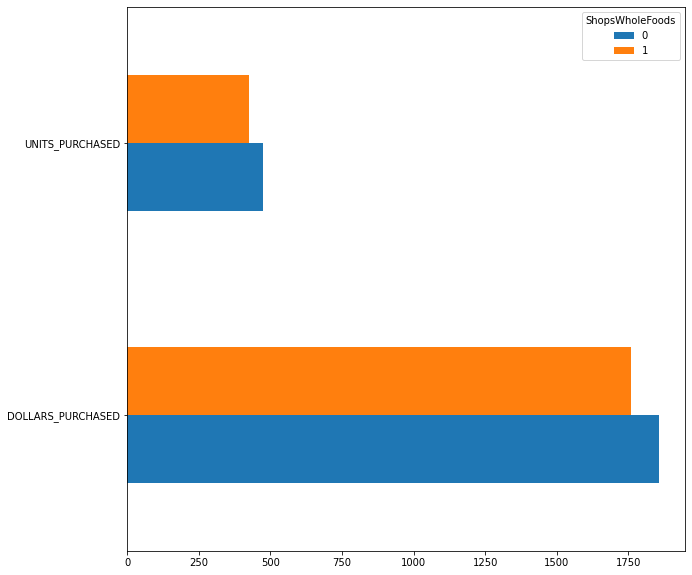

In [92]:
merged_demo.groupby('ShopsWholeFoods')[['DOLLARS_PURCHASED', 'UNITS_PURCHASED']].mean().T.plot(kind='barh', figsize=(10,10))


In [171]:
customer_data = pd.read_csv("customer-sales-data-deidentified.csv")
customer_data.head(5)

,GeneratedAnonCID,WEG_BRAND,KOSHER,ORGANIC,DEPARTMENT_NBR,DEPARTMENT_NAME,CATEGORY_NBR,CATEGORY_NAME,CLASS_NBR,CLASS_NAME,UNITS_PURCHASED,DOLLARS_PURCHASED
0,11610,Other,Other,Other,4,GROCERY,4037,COLD CEREAL,4037050,ALL FAMILY CEREAL,3,17.47
1,11610,Wegmans Brand,Other,Other,81,OLDE WORLD CHEESE,81019,MOZZARELLA & BURRATA,81019001,FRESH MOZZARELLA,1,8.99
2,11610,Other,Kosher,Other,4,GROCERY,4029,JUICES - SHELF STABLE,4029022,GRAPEFRUIT,1,3.29
3,11610,Wegmans Brand,Other,Other,4,GROCERY,4045,VEGETABLES - SHELF STABLE,4045080,ASST VEGETABLES,1,2.29
4,11610,Wegmans Brand,Other,Organic,4,GROCERY,4017,CHIPS & SNACKS,4017020,TORTILLA CHIPS/CORN CHIPS,1,0.00


In [172]:
customer_data.describe(include='all')

,GeneratedAnonCID,WEG_BRAND,KOSHER,ORGANIC,DEPARTMENT_NBR,DEPARTMENT_NAME,CATEGORY_NBR,CATEGORY_NAME,CLASS_NBR,CLASS_NAME,UNITS_PURCHASED,DOLLARS_PURCHASED
count,2.863141e+06,2863141,2863141,2863141,2.863141e+06,2863141,2.863141e+06,2863141,2.863141e+06,2863141,2.863141e+06,2.863141e+06
unique,NaN,2,2,2,NaN,49,NaN,625,NaN,3285,NaN,NaN
top,NaN,Wegmans Brand,Other,Other,NaN,GROCERY,NaN,CHIPS & SNACKS,NaN,TORTILLA CHIPS/CORN CHIPS,NaN,NaN
freq,NaN,1590439,2787381,2587610,NaN,1023595,NaN,73003,NaN,14585,NaN,NaN
mean,8.182829e+03,NaN,NaN,NaN,1.611479e+01,NaN,1.614503e+04,NaN,1.614506e+07,NaN,3.236146e+00,1.279876e+01
std,4.703979e+03,NaN,NaN,NaN,2.337128e+01,NaN,2.336783e+04,NaN,2.336782e+07,NaN,6.535831e+00,2.543223e+01
min,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,1.001000e+03,NaN,1.001001e+06,NaN,-1.600000e+01,-4.995900e+02
25%,4.114000e+03,NaN,NaN,NaN,4.000000e+00,NaN,4.005000e+03,NaN,4.005070e+06,NaN,1.000000e+00,2.990000e+00
50%,8.169000e+03,NaN,NaN,NaN,4.000000e+00,NaN,4.056000e+03,NaN,4.056040e+06,NaN,1.000000e+00,5.990000e+00
75%,1.226000e+04,NaN,NaN,NaN,1.800000e+01,NaN,1.800700e+04,NaN,1.800702e+07,NaN,3.000000e+00,1.298000e+01


In [173]:
#recode
customer_data['WEG_BRAND'] = np.where(customer_data['WEG_BRAND'] == "Other", 0, 1)
customer_data['KOSHER'] = np.where(customer_data['KOSHER'] == "Other", 0, 1)
customer_data['ORGANIC'] = np.where(customer_data['ORGANIC'] == "Other", 0, 1)
customer_data.head(5)

,GeneratedAnonCID,WEG_BRAND,KOSHER,ORGANIC,DEPARTMENT_NBR,DEPARTMENT_NAME,CATEGORY_NBR,CATEGORY_NAME,CLASS_NBR,CLASS_NAME,UNITS_PURCHASED,DOLLARS_PURCHASED
0,11610,0,0,0,4,GROCERY,4037,COLD CEREAL,4037050,ALL FAMILY CEREAL,3,17.47
1,11610,1,0,0,81,OLDE WORLD CHEESE,81019,MOZZARELLA & BURRATA,81019001,FRESH MOZZARELLA,1,8.99
2,11610,0,1,0,4,GROCERY,4029,JUICES - SHELF STABLE,4029022,GRAPEFRUIT,1,3.29
3,11610,1,0,0,4,GROCERY,4045,VEGETABLES - SHELF STABLE,4045080,ASST VEGETABLES,1,2.29
4,11610,1,0,1,4,GROCERY,4017,CHIPS & SNACKS,4017020,TORTILLA CHIPS/CORN CHIPS,1,0.00


In [177]:
#sum up categoric variable based on id
dff = customer_data.groupby(["GeneratedAnonCID"]).WEG_BRAND.sum().reset_index()
dff2= customer_data.groupby(["GeneratedAnonCID"]).KOSHER.sum().reset_index()
dff3= customer_data.groupby(["GeneratedAnonCID"]).ORGANIC.sum().reset_index()
merged = pd.merge(merged_demo,dff,on='GeneratedAnonCID',how='left')
merged2 = pd.merge(merged,dff2,on='GeneratedAnonCID',how='left')
merged3 = pd.merge(merged2,dff3,on='GeneratedAnonCID',how='left')
merged3


,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat,UNITS_PURCHASED,DOLLARS_PURCHASED,WEG_BRAND,KOSHER,ORGANIC
0,1,0,0,5.0,3,-75.54,41.36,803,3430.71,90,11,29
1,2,0,3,4.0,2,-77.10,43.02,790,2533.81,190,6,20
2,3,0,3,1.0,1,-76.76,38.87,276,1197.88,76,3,13
3,4,0,5,4.0,1,-77.27,38.62,393,1957.67,61,6,7
4,5,0,6,3.0,1,-77.77,43.17,9,57.92,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15415,16355,0,6,4.0,1,-76.15,36.88,97,721.13,35,0,6
15416,16356,0,6,3.0,1,-77.48,38.99,1136,4324.47,114,3,7
15417,16357,0,0,2.0,1,-71.12,42.28,69,283.46,115,8,10
15418,16358,1,5,2.0,3,-75.27,40.00,701,2418.28,131,9,25


In [182]:
sales_by_store_location = sales_by_store[["GeneratedAnonCID","STORE_LAT", "STORE_LONG"]]
sales_by_store_location2 = sales_by_store_location.drop_duplicates(subset = "GeneratedAnonCID")
sales_by_store_location2

,GeneratedAnonCID,STORE_LAT,STORE_LONG
0,429,42.931400,-76.565400
1,13124,43.047200,-76.226200
2,408,42.977000,-78.737800
3,9958,43.083580,-77.627480
4,14180,35.964242,-78.534349
...,...,...,...
33034,2266,43.083580,-77.627480
33037,8579,42.875410,-77.254080
33118,201,40.811800,-77.908180
33121,1710,40.838000,-74.437000


In [183]:
merged4 = pd.merge(merged3,sales_by_store_location2,on='GeneratedAnonCID',how='inner')
merged4

,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat,UNITS_PURCHASED,DOLLARS_PURCHASED,WEG_BRAND,KOSHER,ORGANIC,STORE_LAT,STORE_LONG
0,1,0,0,5.0,3,-75.54,41.36,803,3430.71,90,11,29,40.714030,-75.287020
1,2,0,3,4.0,2,-77.10,43.02,790,2533.81,190,6,20,42.875410,-77.254080
2,3,0,3,1.0,1,-76.76,38.87,276,1197.88,76,3,13,38.920900,-76.850100
3,4,0,5,4.0,1,-77.27,38.62,393,1957.67,61,6,7,38.630840,-77.288841
4,5,0,6,3.0,1,-77.77,43.17,9,57.92,22,1,0,43.163850,-77.688400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,16355,0,6,4.0,1,-76.15,36.88,97,721.13,35,0,6,36.842046,-76.140387
15416,16356,0,6,3.0,1,-77.48,38.99,1136,4324.47,114,3,7,39.006910,-77.440810
15417,16357,0,0,2.0,1,-71.12,42.28,69,283.46,115,8,10,42.797626,-77.782520
15418,16358,1,5,2.0,3,-75.27,40.00,701,2418.28,131,9,25,40.083100,-75.402200


In [ ]:
merged4.to_csv("merged_demo_v2.csv",index = False)

In [124]:
customer_data2 = pd.read_csv("customer-sales-data-deidentified.csv")
customer_data2.head()

,GeneratedAnonCID,WEG_BRAND,KOSHER,ORGANIC,DEPARTMENT_NBR,DEPARTMENT_NAME,CATEGORY_NBR,CATEGORY_NAME,CLASS_NBR,CLASS_NAME,UNITS_PURCHASED,DOLLARS_PURCHASED
0,11610,Other,Other,Other,4,GROCERY,4037,COLD CEREAL,4037050,ALL FAMILY CEREAL,3,17.47
1,11610,Wegmans Brand,Other,Other,81,OLDE WORLD CHEESE,81019,MOZZARELLA & BURRATA,81019001,FRESH MOZZARELLA,1,8.99
2,11610,Other,Kosher,Other,4,GROCERY,4029,JUICES - SHELF STABLE,4029022,GRAPEFRUIT,1,3.29
3,11610,Wegmans Brand,Other,Other,4,GROCERY,4045,VEGETABLES - SHELF STABLE,4045080,ASST VEGETABLES,1,2.29
4,11610,Wegmans Brand,Other,Organic,4,GROCERY,4017,CHIPS & SNACKS,4017020,TORTILLA CHIPS/CORN CHIPS,1,0.00


In [133]:
Crosstab = pd.crosstab(index=customer_data2['GeneratedAnonCID'], columns=[customer_data2['DEPARTMENT_NAME'],customer_data2['CATEGORY_NAME'],customer_data2['CLASS_NAME']])

In [134]:
merged_all = pd.merge(merged_demo,Crosstab,on='GeneratedAnonCID',how='inner')
merged_all

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)


,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat,UNITS_PURCHASED,DOLLARS_PURCHASED,"(ASIAN, ASIAN CATERING, ASIAN COLD CATERING)",...,"(WINE, VIRGINIA, OTHER WHITE)","(WINE, WASHINGTON, CABERNET SAUVIGNON)","(WINE, WASHINGTON, CHARDONNAY)","(WINE, WASHINGTON, MERLOT)","(WINE, WASHINGTON, OTHER BLUSH)","(WINE, WASHINGTON, OTHER RED)","(WINE, WASHINGTON, OTHER WHITE)","(WINE, WASHINGTON, RIESLING)","(WINE, WINE GIFT PACKS, GIFT PACKS)","(WINE, WINE PRE MIXED COCKTAILS, PRE MIXED COCKTAILS)"
0,1,0,0,5.0,3,-75.54,41.36,803,3430.71,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,3,4.0,2,-77.10,43.02,790,2533.81,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,3,1.0,1,-76.76,38.87,276,1197.88,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,5,4.0,1,-77.27,38.62,393,1957.67,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,6,3.0,1,-77.77,43.17,9,57.92,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,16355,0,6,4.0,1,-76.15,36.88,97,721.13,0,...,0,0,0,0,0,0,0,0,0,0
15416,16356,0,6,3.0,1,-77.48,38.99,1136,4324.47,0,...,0,0,0,0,0,0,0,0,0,0
15417,16357,0,0,2.0,1,-71.12,42.28,69,283.46,0,...,0,0,0,0,0,0,0,0,0,0
15418,16358,1,5,2.0,3,-75.27,40.00,701,2418.28,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged4.to_csv("merged_demo_v3.csv",index = False)

In [267]:
df = pd.read_csv("customer-demo-data-deidentified.csv")

AttributeError: 'Rectangle' object has no property 'column'

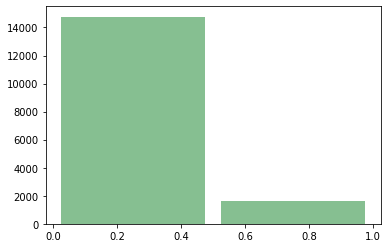

In [268]:
plt=df['ShopsWholeFoods'].hist(column='ShopsWholeFoods', bins=2, grid=False, figsize=(6,4), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

   
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

   
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    
    x.set_title("If the ")

    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [135]:
merged4.to_csv("merged_demo_v3.csv",index = False)

In [265]:
location = merged4[['GeneratedAnonCID',"STORE_LAT","STORE_LONG"]]

In [266]:
import folium
from folium.plugins import FastMarkerCluster

m=folium.Map(location=[location['STORE_LAT'].mean(),location['STORE_LONG'].mean()],radius=3,color='green',zoom_start=7)

location.apply(add_marker,axis=1)
m.save('map_pickup.html')

In [204]:
df_demo = pd.read_csv("df_demo.csv")
df_demo

,Unnamed: 0,GeneratedAnonCID,ShopsWholeFoods,HouseholdIncome,HouseholdTotal,HealthHelpValueSegment,long,lat,IncomeLevel,HHVsegment,location
0,0,1,0,Prefer not to say,5.0,Health,-75.54,41.36,7,0,4
1,1,2,0,"$50,000-$99,999",4.0,Value,-77.10,43.02,5,3,2
2,2,3,0,"$50,000-$99,999",1.0,Help,-76.76,38.87,5,1,0
3,3,4,0,"$150,000-$199,999",4.0,Help,-77.27,38.62,1,1,0
4,4,5,0,"$200,000 or more",3.0,Help,-77.77,43.17,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12638,16354,16355,0,"$200,000 or more",4.0,Help,-76.15,36.88,4,1,0
12639,16355,16356,0,"$200,000 or more",3.0,Help,-77.48,38.99,4,1,0
12640,16356,16357,0,Prefer not to say,2.0,Help,-71.12,42.28,7,1,3
12641,16357,16358,1,"$150,000-$199,999",2.0,Health,-75.27,40.00,1,0,4


In [226]:
df = df_demo[["GeneratedAnonCID","lat", "long"]]

In [241]:
import folium
from folium.plugins import FastMarkerCluster

m=folium.Map(location=[df['lat'].mean(),df['long'].mean()],zoom_start=7)
def add_marker(row):
    if row['GeneratedAnonCID'] == 1:

        marker=folium.CircleMarker([row['lat'],row['long']],radius=1,color='green',popup=row['GeneratedAnonCID'])
        marker.add_to(m)

    else:
        marker=folium.CircleMarker([row['lat'],row['long']],radius=1,color='red',popup=row['GeneratedAnonCID'])
        marker.add_to(m)


df.apply(add_marker,axis=1)
m.save('Customer_Location.html')

In [253]:
merged_location = pd.merge(location,df,on='GeneratedAnonCID',how='inner')
merged_location

,GeneratedAnonCID,STORE_LAT,STORE_LONG,lat,long
0,1,40.714030,-75.287020,41.36,-75.54
1,2,42.875410,-77.254080,43.02,-77.10
2,3,38.920900,-76.850100,38.87,-76.76
3,4,38.630840,-77.288841,38.62,-77.27
4,5,43.163850,-77.688400,43.17,-77.77
...,...,...,...,...,...
12192,16355,36.842046,-76.140387,36.88,-76.15
12193,16356,39.006910,-77.440810,38.99,-77.48
12194,16357,42.797626,-77.782520,42.28,-71.12
12195,16358,40.083100,-75.402200,40.00,-75.27
